In [ ]:
conda install -c conda-forge jieba

In [1]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


# 作業1 開始

In [110]:
#把文章抓進text裡
#方法一：先把txt放進本機
f = open('aaa.txt',encoding="utf-8")
#一行算一個文章
for line in f:
    text.append(line)
#測試是否讀到
print(text[0])

# #方法二：直接從網路上抓txt
# import requests
# response = requests.get('https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt')
# aaa = []
# qqq = response.text
# text = []
# for i in range(418202):
#     text.append(qqq.split('\n')[i])
# #測試是否讀到
# print(text[0])


In [11]:
import jieba
seg_list = jieba.lcut(text[0])
#測試分詞結果
print(seg_list)

['為', '什麼', ' ', '聖結石', ' ', '會', '被', '酸', '而', ' ', '這群', '人', ' ', '不會', '？', '\t', '質感', ' ', '劇本', ' ', '成員', ' ', '都', '差', '很多', '好', '嗎', ' ', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '\n']


由於會出現額外的特殊字元，把他們一個一個刪除

In [85]:
import jieba
from collections import Counter
stop_words = [' ', '\t', '\n']
# 載入檔案並進行分詞
with open('aaa.txt', 'r', encoding='utf-8') as f:
    data = f.read()
# 移除不必要的詞彙
    word_list = jieba.cut(data,cut_all=False)
    word_list = [x for x in word_list if x != '\t']
    word_list = [x for x in word_list if x != '\n']
    word_list = [x for x in word_list if x != ' ']
    word_list = [x for x in word_list if x != '？']
    word_list = [x for x in word_list if x != '，']
    word_list = [x for x in word_list if x != '?']
    word_list = [x for x in word_list if x != '!']
    word_list = [x for x in word_list if x != '！']
    word_list = [x for x in word_list if x != '。']
    word_list = [x for x in word_list if x != '~']
    word_list = [x for x in word_list if x != ',']
    word_list = [x for x in word_list if x != '...']
    

# 計算每個詞的頻率
word_count = Counter(word_list)

# 印出前 100 高頻詞
x=[]
y1=[]
for word, count in word_count.most_common(100):
    print(word, count)
    x.append(word)
    y1.append(count)
#檢查內容是否正常
print("--------")
print(x)
print("--------")
print(y1)

的 317883
有 202811
是 100613
沒 93778
嗎 89875
八卦 79119
了 77440
都 64114
你 62915
人 61440
在 58795
什麼 57760
我 49063
就 47754
好 42804
要 37354
不 36863
說 36650
台灣 35851
去 35677
會 34672
跟 33271
怎麼 33196
為 30834
很 30177
被 29440
啊 28361
也 24678
吃 23985
可以 23236
肥宅 21771
是不是 21560
到 20970
想 20654
來 17310
看 17205
真的 16890
後 16327
錢 16233
吧 15816
幹 15569
他 15073
比 14422
知道 14114
才 13961
辦 13953
自己 13560
多 13232
誰 12948
不是 11943
上 11729
阿 11405
現在 11279
買 11229
就是 11021
啦 10920
最 10769
不會 10751
如果 10690
還是 10589
一個 10535
對 10517
喔 10494
把 10354
該 10303
中國 10230
一堆 10098
用 9689
這樣 9671
有人 9666
做 9545
又 9517
話 9276
較 8957
和 8940
怎樣 8861
時候 8806
女生 8630
日本 8594
聽 8523
一樣 8514
到底 8471
得 8300
不要 8245
讓 8241
打 8218
卦 8155
能 7899
再 7888
大家 7886
沒有 7745
叫 7637
很多 7488
小 7456
長 7214
年 7095
應該 7003
那 6816
喜歡 6782
死 6711
--------
['的', '有', '是', '沒', '嗎', '八卦', '了', '都', '你', '人', '在', '什麼', '我', '就', '好', '要', '不', '說', '台灣', '去', '會', '跟', '怎麼', '為', '很', '被', '啊', '也', '吃', '可以', '肥宅', '是不是', '到', '想', '來', '看'

In [38]:
import jieba.analyse

# 將詞彙列表轉換為字串
text = ' '.join(word_list)

# 使用 jieba.analyse.extract_tags() 函式提取關鍵詞
# 並按照 TF-IDF 權重排序，取前一百個詞彙
top_words = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

# 輸出前一百個詞彙及其 TF-IDF 權重
xx=[]
y2=[]
for word, weight in top_words:
    xx.append(word)
    y2.append(weight)
    print(word, weight)
print("--------")
print(xx)
print("--------")
print(y2)

什麼 0.19632529518327688
八卦 0.19580344290318757
台灣 0.12555944280321196
怎麼 0.11278774897295155
肥宅 0.07413969967281527
現在 0.03834226253644289
不會 0.03654491589206732
還是 0.035980909194588406
是不是 0.035869248647285024
一個 0.03579743713637238
中國 0.034798533708307315
這樣 0.032858486574208166
怎樣 0.030106405700967696
時候 0.02991953601204396
一樣 0.02892742784539431
真的 0.027043423309765727
沒有 0.026328240354000526
應該 0.023793607846053128
可以 0.02314723947955691
喜歡 0.023046129090358185
因為 0.022611232359772037
一堆 0.021858901417371936
問題 0.020987164881489388
感覺 0.020885235960258257
哪個 0.020820680976811876
女生 0.020724497033524598
這麼 0.020127564312440203
覺得 0.01880928359785094
這種 0.01839817028221872
美國 0.01827245794603366
正妹 0.016434339733165642
知道 0.015941341893717882
其實 0.015754813591624783
為何 0.015167023479191941
還有 0.014918996437529529
東西 0.014871429607621669
比較 0.014636993088790073
那麼 0.014487497337651084
到底 0.013969972935042119
有人 0.013787111219668894
自己 0.013577260749511846
QQ 0.01355654652374011
時間 0.0

# 頻率圖(前100個) fig#1

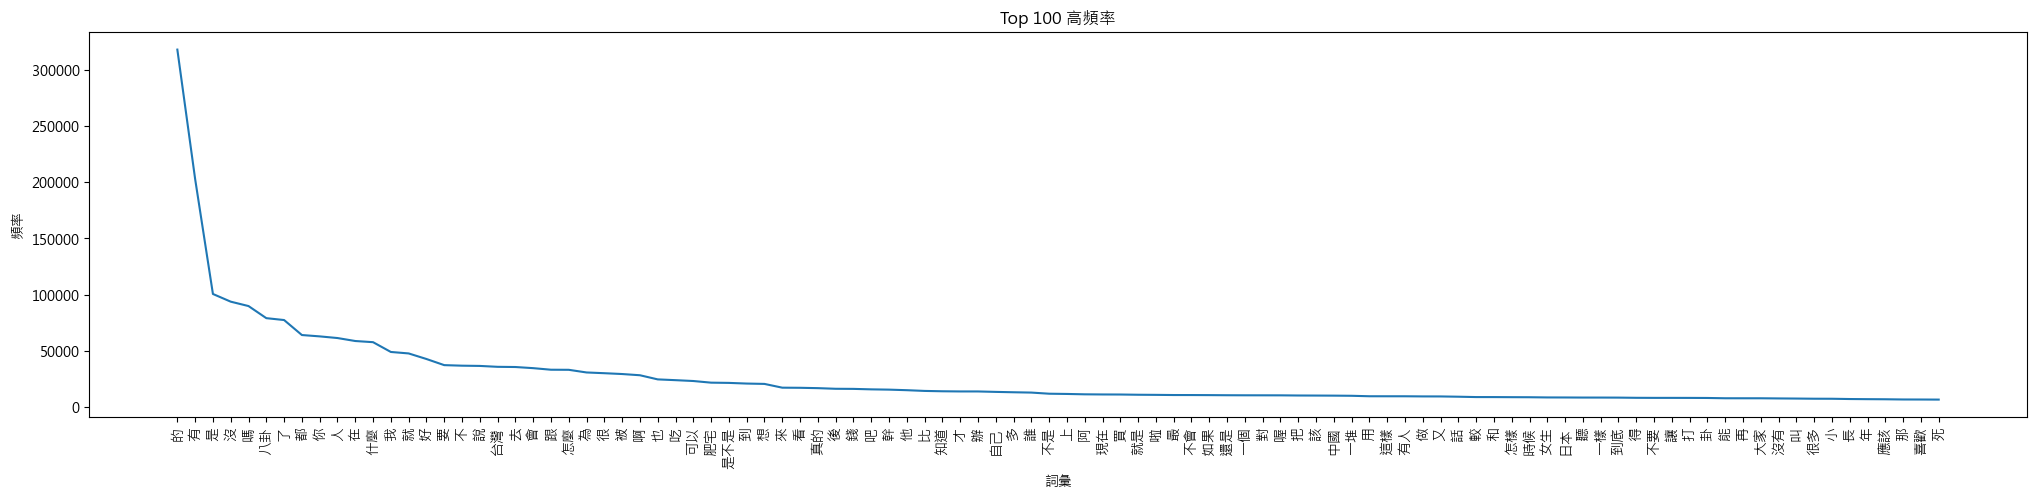

In [51]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 創建一個Python列表


# 繪製圖
plt.figure(figsize = (25,5))
plt.plot(x, y1)

# 添加標籤
plt.title("Top 100 高頻率")
plt.xlabel("詞彙")
plt.ylabel("頻率")
plt.xticks(rotation = 90)
# 顯示圖形
plt.show()


# TF-IDF圖(前100個) fig#2

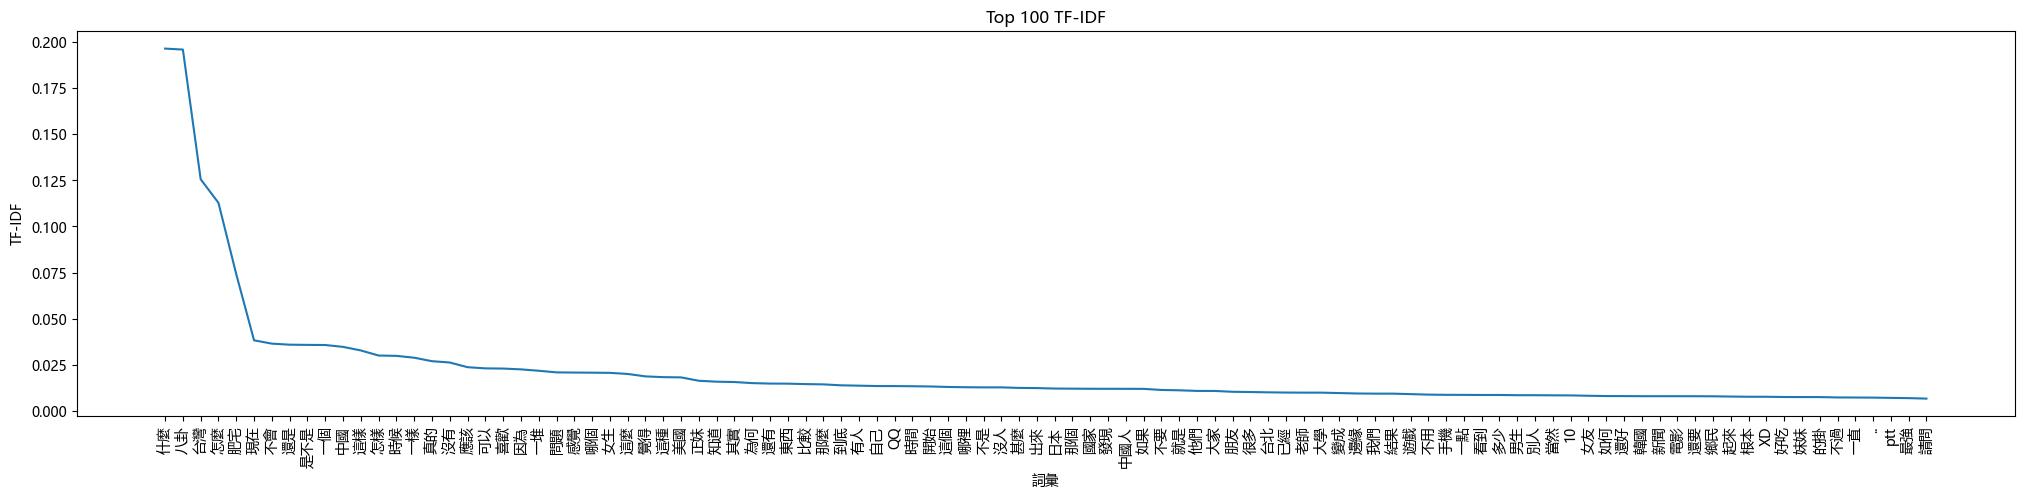

In [73]:
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# plt.rcParams['axes.unicode_minus'] = False

# 繪製圖
plt.figure(figsize = (25,5))
plt.plot(xx, y2)

# 添加標籤
plt.title("Top 100 TF-IDF")
plt.xlabel("詞彙")
plt.ylabel("TF-IDF")
plt.xticks(rotation = 90)
# 顯示圖形
plt.show()

# 文字雲fig#3

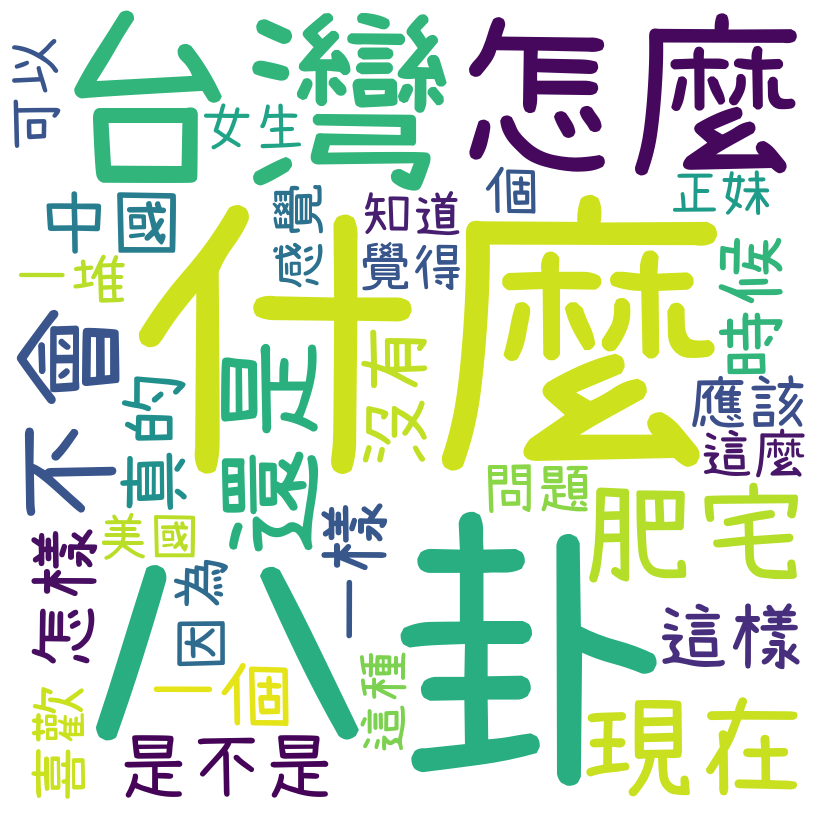

In [82]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 要轉換為文字雲的List，包含中文字
words_list = ["中文", "文字雲", "程式設計", "資料科學", "人工智慧", "機器學習", "大數據"]

# 將List中的中文字進行分詞處理
seg_list = jieba.cut(" ".join(xx[:32]), cut_all=False)

# 將分詞後的結果轉換為字串
seg_str = " ".join(seg_list)

# 將分詞後的結果轉換為文字雲
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                font_path='aaa.ttf',  # 設定字型檔案路徑，用於顯示中文
                min_font_size = 10).generate(seg_str)


# 顯示文字雲
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
